In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
import qubit_templates
from qubit_templates import *
from functions import *
import ChipDesign
from ChipDesign import *

# Read configuration file

In [3]:
outname = "TcSampleDesign_grid"

config = load_config( f"config/common_Tc.yaml" )
# グローバル変数として定義
globals().update(config)
qubit_templates.__dict__.update(config)
ChipDesign.__dict__.update(config)

# Wafer design

In [4]:
wafer = device_Wafer(inch = 4)

# Place chip designs

Length : 4539.977936223893 [um]
Length : 3934.6461783635814 [um]
Length : 4539.977936223893 [um]
Length : 3934.6461783635814 [um]
Length : 4539.977936223893 [um]
Length : 3934.6461783635814 [um]
Length : 4539.977936223893 [um]
Length : 3934.6461783635814 [um]
Length : 4215.693438240338 [um]
Length : 3688.7304935164034 [um]
Length : 4215.693438240338 [um]
Length : 3688.7304935164034 [um]
Length : 4215.693438240338 [um]
Length : 3688.7304935164034 [um]
Length : 4215.693438240338 [um]
Length : 3688.7304935164034 [um]
Length : 3934.6468733212578 [um]
Length : 3471.746065710069 [um]
Length : 3934.6468733212578 [um]
Length : 3471.746065710069 [um]
Length : 3934.6468733212578 [um]
Length : 3471.746065710069 [um]
Length : 3934.6468733212578 [um]
Length : 3471.746065710069 [um]
Length : 3688.7311290170614 [um]
Length : 3278.8710187711054 [um]
Length : 3688.7311290170614 [um]
Length : 3278.8710187711054 [um]
Length : 3688.7311290170614 [um]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Length : 3278.8710187711054 [um]
Length : 3688.7311290170614 [um]
Length : 3278.8710187711054 [um]


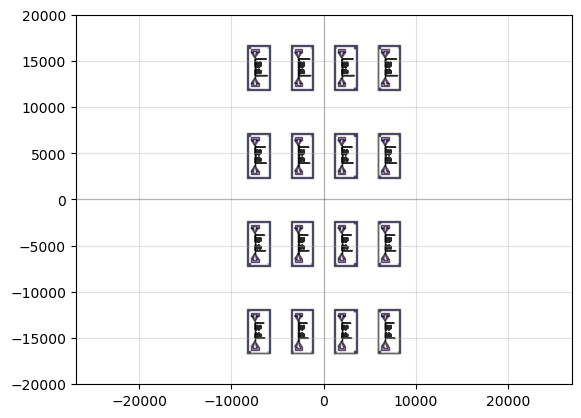

In [ ]:
def custom_chip(dummy, frequency):
    return chipdesign_TcSample(frequency)

D = pg.gridsweep(
    function = custom_chip,
    param_x = {'dummy' : [0, 0, 0, 0]},
    param_y = {'frequency' : Grid_frequency},
    spacing = (Grid_gap_x * Frame_size_width, Grid_gap_y * Frame_size_height),
    label_layer = None
    )
D.center = (0,0)

## Remove corners
# for iref, ref in enumerate(D.references[:]):
#     if iref == 0 or iref == len(Grid_width)-1 or iref == len(Grid_width) * (len(Grid_height)-1) or iref == len(Grid_width) * len(Grid_height) - 1:
#         D.remove(ref)

wafer.add_ref(D)
qp(D)


# Add grid lines

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


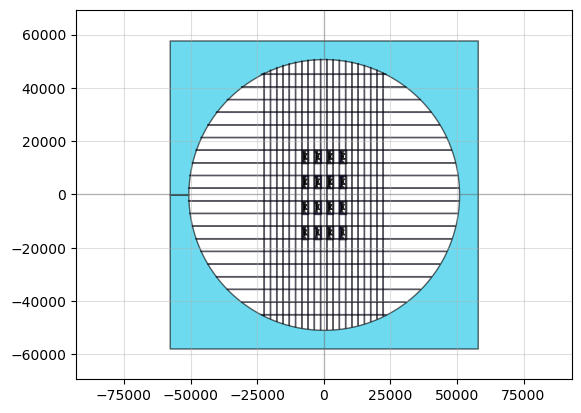

In [7]:
grid = device_Grid(inch = 4, n_gridline = Grid_lines)
wafer.add_ref( grid )

qp(wafer)


In [8]:
wafer.write_gds('output/' + outname)

'output/TcSampleDesign_grid.gds'